# Pronóstico de fallas para mantenimiento predictivo usando metodologías de aprendizaje profundo supervisado
### Francisco Araya López - Departamento de Eléctronica - UTFSM
### Turbofan Engine Simulation Dataset
### Octubre 2020

## Gráficos dispersion RUL verdadero vs RUL estimado + Gráficos Log(Error) vs # Epochs de modelos entrenados con arquitectura propuesta basada en Babu et al.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
import random
import time
import codecs, json

%matplotlib inline

# Training y validation error - Ba/Dataset FD001+FD003/Ntw = 19

In [2]:
obj_text = codecs.open("FD001+FD003/19_1024_250/losstrain_Ba_FD001+FD003_1024_250_19.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
losstrain_Ba_FD001_FD003_1024_250_19 = np.array(np.log10(b_new))

#### mismo para train

obj_text = codecs.open("FD001+FD003/19_1024_250/lossval_Ba_FD001+FD003_1024_250_19.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
lossval_Ba_FD001_FD003_1024_250_19 = np.array(np.log10(b_new))

In [3]:
obj_text = codecs.open("FD001+FD003/19_1024_500/losstrain_Ba_FD001+FD003_1024_500_19.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
losstrain_Ba_FD001_FD003_1024_500_19 = np.array(np.log10(b_new))

##

obj_text = codecs.open("FD001+FD003/19_1024_500/lossval_Ba_FD001+FD003_1024_500_19.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
lossval_Ba_FD001_FD003_1024_500_19 = np.array(np.log10(b_new))

In [4]:
obj_text = codecs.open("FD001+FD003/19_512_250/losstrain_Ba_FD001+FD003_512_250_19.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
losstrain_Ba_FD001_FD003_512_250_19 = np.array(np.log10(b_new))

##

obj_text = codecs.open("FD001+FD003/19_512_250/lossval_Ba_FD001+FD003_512_250_19.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
lossval_Ba_FD001_FD003_512_250_19 = np.array(np.log10(b_new))

In [5]:
obj_text = codecs.open("FD001+FD003/19_512_500/losstrain_Ba_FD001+FD003_512_500_19.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
losstrain_Ba_FD001_FD003_512_500_19 = np.array(np.log10(b_new))

##

obj_text = codecs.open("FD001+FD003/19_512_500/lossval_Ba_FD001+FD003_512_500_19.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
lossval_Ba_FD001_FD003_512_500_19 = np.array(np.log10(b_new))

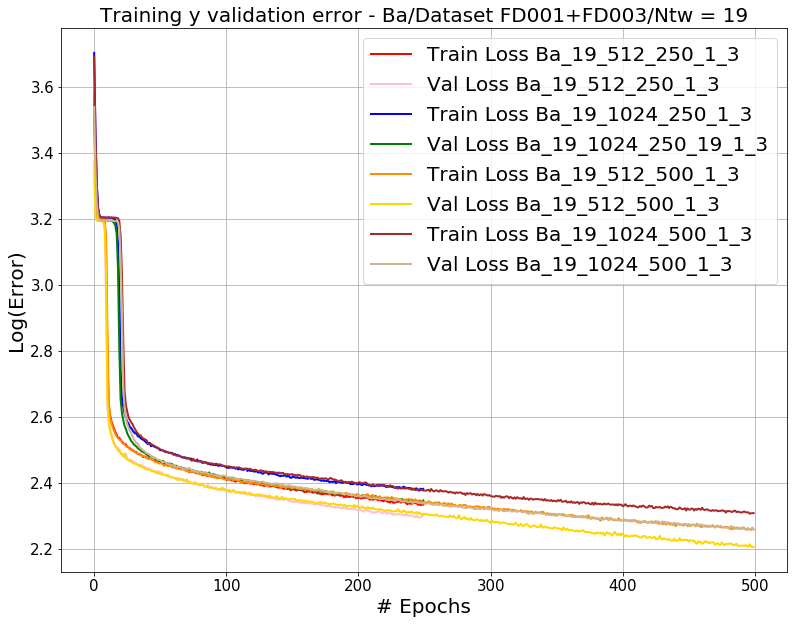

In [6]:
epochs1 = range(len(losstrain_Ba_FD001_FD003_1024_250_19))
epochs2 = range(len(losstrain_Ba_FD001_FD003_1024_500_19))


plt.figure(figsize=(13,10))
plt.grid(True) 
plt.plot(epochs1, losstrain_Ba_FD001_FD003_512_250_19, 'red',lw=2, label='Train Loss Ba_19_512_250_1_3')
plt.plot(epochs1, lossval_Ba_FD001_FD003_512_250_19, 'pink',lw=2, label='Val Loss Ba_19_512_250_1_3')
plt.plot(epochs1, losstrain_Ba_FD001_FD003_1024_250_19, 'blue',lw=2, label='Train Loss Ba_19_1024_250_1_3')
plt.plot(epochs1, lossval_Ba_FD001_FD003_1024_250_19, 'green',lw=2, label='Val Loss Ba_19_1024_250_19_1_3')
plt.plot(epochs2, losstrain_Ba_FD001_FD003_512_500_19, 'darkorange',lw=2, label='Train Loss Ba_19_512_500_1_3')
plt.plot(epochs2, lossval_Ba_FD001_FD003_512_500_19, 'gold',lw=2, label='Val Loss Ba_19_512_500_1_3')
plt.plot(epochs2, losstrain_Ba_FD001_FD003_1024_500_19, 'brown',lw=2, label='Train Loss Ba_19_1024_500_1_3')
plt.plot(epochs2, lossval_Ba_FD001_FD003_1024_500_19, 'tan',lw=2, label='Val Loss Ba_19_1024_500_1_3')
plt.ylabel("Log(Error)",fontsize=20)
plt.xlabel("# Epochs",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Training y validation error - Ba/Dataset FD001+FD003/Ntw = 19',fontsize=20)
plt.legend(prop={"size":20})
  
plt.savefig("error_Ba_19_1_3.png")
plt.show()

# predictions - Li/Dataset FD001+FD003/Ntw = 19

In [7]:
obj_text = codecs.open("FD001+FD003/19_1024_500/predictions_Ba_FD001+FD003_1024_500_19.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
predictions_Ba_FD001_FD003_1024_500_19 = np.array(b_new)[::-1]

##

obj_text = codecs.open("FD001+FD003/19_1024_250/predictions_Ba_FD001+FD003_1024_250_19.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
predictions_Ba_FD001_FD003_1024_250_19 = np.array(b_new)[::-1]

##
obj_text = codecs.open("FD001+FD003/19_512_500/predictions_Ba_FD001+FD003_512_500_19.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
predictions_Ba_FD001_FD003_512_500_19 = np.array(b_new)[::-1]

##
obj_text = codecs.open("FD001+FD003/19_512_250/predictions_Ba_FD001+FD003_512_250_19.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
predictions_Ba_FD001_FD003_512_250_19 = np.array(b_new)[::-1]

##

obj_text = codecs.open("predicts13.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
predictions13 = np.array(b_new)[::-1]

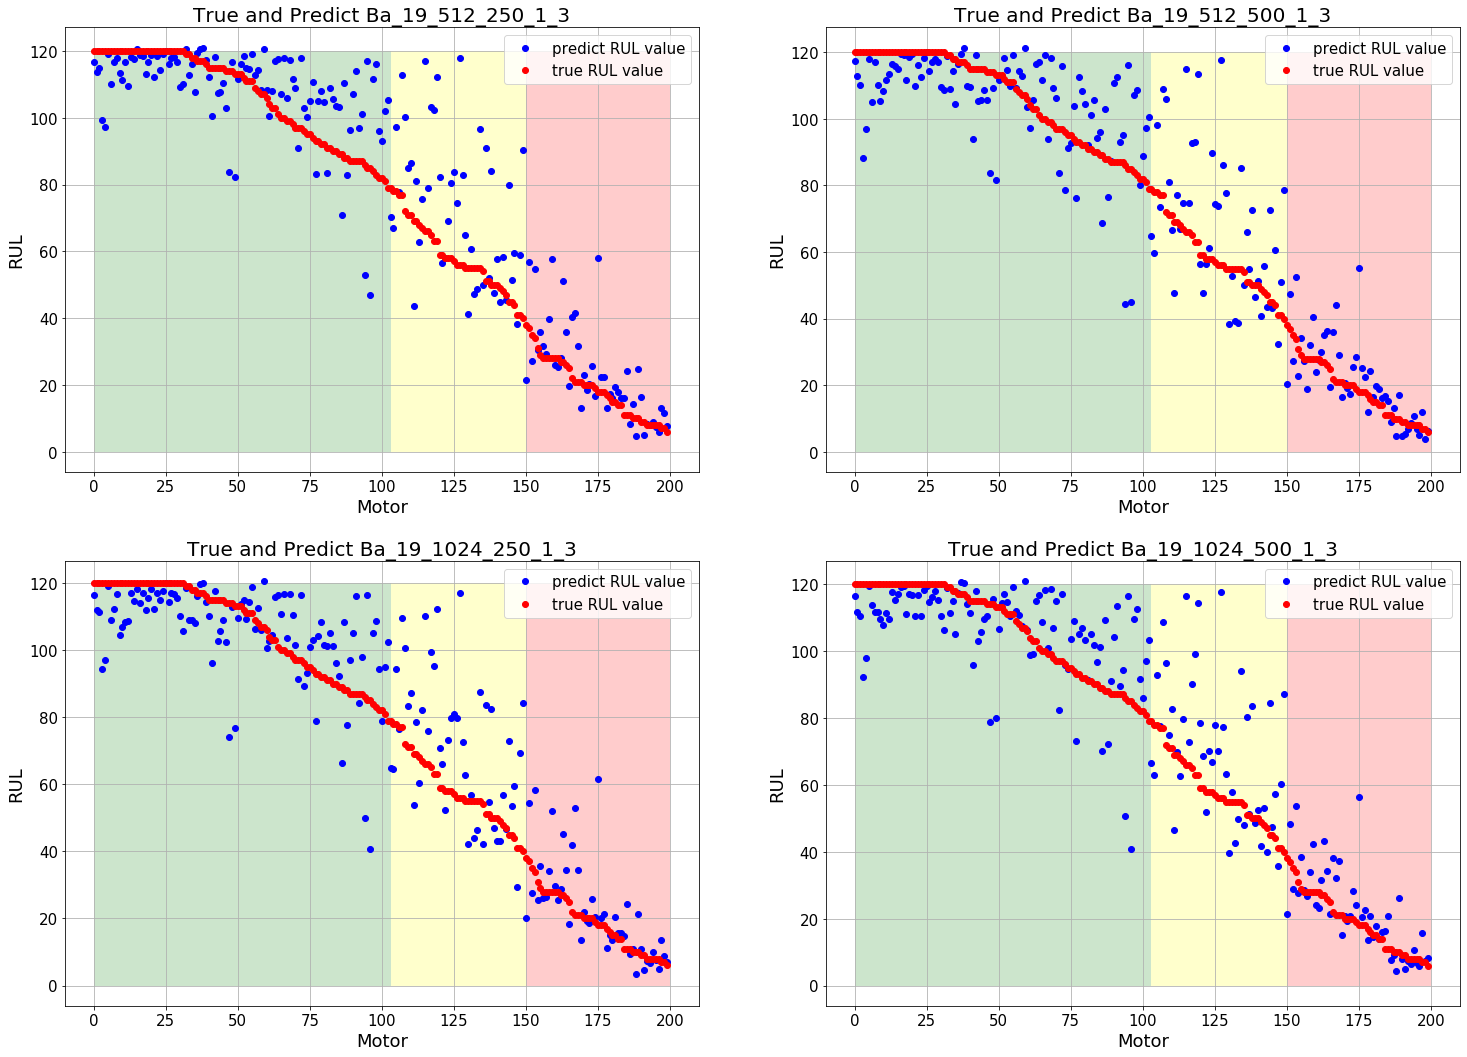

In [9]:
leng = range(len(predictions13))

plt.figure(figsize=(25,18))

plt.subplot(224)
plt.grid(True) 
plt.plot(leng, predictions_Ba_FD001_FD003_1024_500_19, 'bo',lw=0.5, label='predict RUL value')
plt.plot(leng, predictions13,'ro',lw=0.5, label='true RUL value')
plt.fill_between([103,0],[120,120],facecolor='green',alpha=0.2)
plt.fill_between([150,103],[120,120],facecolor='yellow',alpha=0.2)
plt.fill_between([200,150],[120,120],facecolor='red',alpha=0.2)
plt.ylabel('RUL',fontsize=18)
plt.xlabel('Motor',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('True and Predict Ba_19_1024_500_1_3',fontsize=20)
plt.legend(prop={"size":15})

plt.subplot(223)
plt.grid(True) 
plt.plot(leng, predictions_Ba_FD001_FD003_1024_250_19,'bo',lw=0.5, label='predict RUL value')
plt.plot(leng, predictions13,'ro',lw=0.5, label='true RUL value')
plt.fill_between([103,0],[120,120],facecolor='green',alpha=0.2)
plt.fill_between([150,103],[120,120],facecolor='yellow',alpha=0.2)
plt.fill_between([200,150],[120,120],facecolor='red',alpha=0.2)
plt.ylabel('RUL',fontsize=18)
plt.xlabel('Motor',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('True and Predict Ba_19_1024_250_1_3',fontsize=20)
plt.legend(prop={"size":15})

plt.subplot(222)
plt.grid(True) 
plt.plot(leng, predictions_Ba_FD001_FD003_512_500_19,'bo',lw=0.2, label='predict RUL value')
plt.plot(leng, predictions13,'ro',lw=0.5, label='true RUL value')
plt.fill_between([103,0],[120,120],facecolor='green',alpha=0.2)
plt.fill_between([150,103],[120,120],facecolor='yellow',alpha=0.2)
plt.fill_between([200,150],[120,120],facecolor='red',alpha=0.2)
plt.ylabel('RUL',fontsize=18)
plt.xlabel('Motor',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('True and Predict Ba_19_512_500_1_3',fontsize=20)
plt.legend(prop={"size":15})

plt.subplot(221)
plt.grid(True) 
plt.plot(leng, predictions_Ba_FD001_FD003_512_250_19,'bo',lw=0, label='predict RUL value')
plt.plot(leng, predictions13,'ro',lw=0.1, label='true RUL value')
plt.fill_between([103,0],[120,120],facecolor='green',alpha=0.2)
plt.fill_between([150,103],[120,120],facecolor='yellow',alpha=0.2)
plt.fill_between([200,150],[120,120],facecolor='red',alpha=0.2)
plt.ylabel('RUL',fontsize=18)
plt.xlabel('Motor',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('True and Predict Ba_19_512_250_1_3',fontsize=20)
plt.legend(prop={"size":15})

plt.savefig('predicts_Ba_19_1_3.png')
plt.show()


# Training y validation error - Ba/Dataset FD001+FD003/Ntw = 10

In [10]:
obj_text = codecs.open("FD001+FD003/10_1024_250/losstrain_Ba_FD001+FD003_1024_250_10.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
losstrain_Ba_FD001_FD003_1024_250_10 = np.array(np.log10(b_new))

#### mismo para train

obj_text = codecs.open("FD001+FD003/10_1024_250/lossval_Ba_FD001+FD003_1024_250_10.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
lossval_Ba_FD001_FD003_1024_250_10 = np.array(np.log10(b_new))

In [11]:
obj_text = codecs.open("FD001+FD003/10_1024_500/losstrain_Ba_FD001+FD003_1024_500_10.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
losstrain_Ba_FD001_FD003_1024_500_10 = np.array(np.log10(b_new))

##

obj_text = codecs.open("FD001+FD003/10_1024_500/lossval_Ba_FD001+FD003_1024_500_10.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
lossval_Ba_FD001_FD003_1024_500_10 = np.array(np.log10(b_new))

In [12]:
obj_text = codecs.open("FD001+FD003/10_512_250/losstrain_Ba_FD001+FD003_512_250_10.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
losstrain_Ba_FD001_FD003_512_250_10 = np.array(np.log10(b_new))

##

obj_text = codecs.open("FD001+FD003/10_512_250/lossval_Ba_FD001+FD003_512_250_10.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
lossval_Ba_FD001_FD003_512_250_10 = np.array(np.log10(b_new))

In [13]:
obj_text = codecs.open("FD001+FD003/10_512_500/losstrain_Ba_FD001+FD003_512_500_10.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
losstrain_Ba_FD001_FD003_512_500_10 = np.array(np.log10(b_new))

##

obj_text = codecs.open("FD001+FD003/10_512_500/lossval_Ba_FD001+FD003_512_500_10.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
lossval_Ba_FD001_FD003_512_500_10 = np.array(np.log10(b_new))

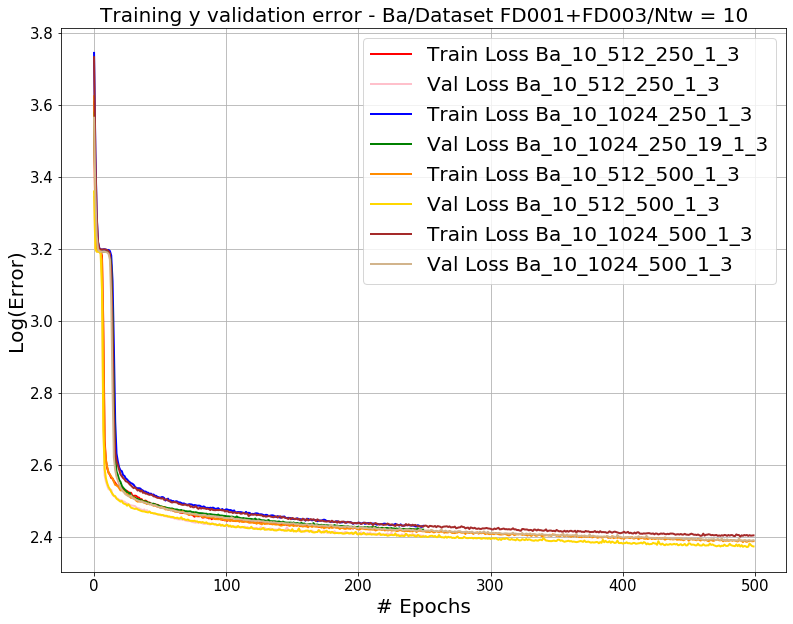

In [14]:
epochs1 = range(len(losstrain_Ba_FD001_FD003_1024_250_10))
epochs2 = range(len(losstrain_Ba_FD001_FD003_1024_500_10))

plt.figure(figsize=(13,10))
plt.grid(True) 
plt.plot(epochs1, losstrain_Ba_FD001_FD003_512_250_10, 'red',lw=2, label='Train Loss Ba_10_512_250_1_3')
plt.plot(epochs1, lossval_Ba_FD001_FD003_512_250_10, 'pink',lw=2, label='Val Loss Ba_10_512_250_1_3')
plt.plot(epochs1, losstrain_Ba_FD001_FD003_1024_250_10, 'blue',lw=2, label='Train Loss Ba_10_1024_250_1_3')
plt.plot(epochs1, lossval_Ba_FD001_FD003_1024_250_10, 'green',lw=2, label='Val Loss Ba_10_1024_250_19_1_3')
plt.plot(epochs2, losstrain_Ba_FD001_FD003_512_500_10, 'darkorange',lw=2, label='Train Loss Ba_10_512_500_1_3')
plt.plot(epochs2, lossval_Ba_FD001_FD003_512_500_10, 'gold',lw=2, label='Val Loss Ba_10_512_500_1_3')
plt.plot(epochs2, losstrain_Ba_FD001_FD003_1024_500_10, 'brown',lw=2, label='Train Loss Ba_10_1024_500_1_3')
plt.plot(epochs2, lossval_Ba_FD001_FD003_1024_500_10, 'tan',lw=2, label='Val Loss Ba_10_1024_500_1_3')
plt.ylabel("Log(Error)",fontsize=20)
plt.xlabel("# Epochs",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Training y validation error - Ba/Dataset FD001+FD003/Ntw = 10',fontsize=20)
plt.legend(prop={"size":20})
  
plt.savefig("error_Ba_10_1_3.png")
plt.show()

# predictions - Ba/Dataset FD001+FD003/Ntw = 10

In [15]:
obj_text = codecs.open("FD001+FD003/10_1024_500/predictions_Ba_FD001+FD003_1024_500_10.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
predictions_Ba_FD001_FD003_1024_500_10 = np.array(b_new)[::-1]

##

obj_text = codecs.open("FD001+FD003/10_1024_250/predictions_Ba_FD001+FD003_1024_250_10.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
predictions_Ba_FD001_FD003_1024_250_10 = np.array(b_new)[::-1]

##
obj_text = codecs.open("FD001+FD003/10_512_500/predictions_Ba_FD001+FD003_512_500_10.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
predictions_Ba_FD001_FD003_512_500_10 = np.array(b_new)[::-1]

##
obj_text = codecs.open("FD001+FD003/10_512_250/predictions_Ba_FD001+FD003_512_250_10.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
predictions_Ba_FD001_FD003_512_250_10 = np.array(b_new)[::-1]

##

obj_text = codecs.open("predicts13.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
predictions13 = np.array(b_new)[::-1]

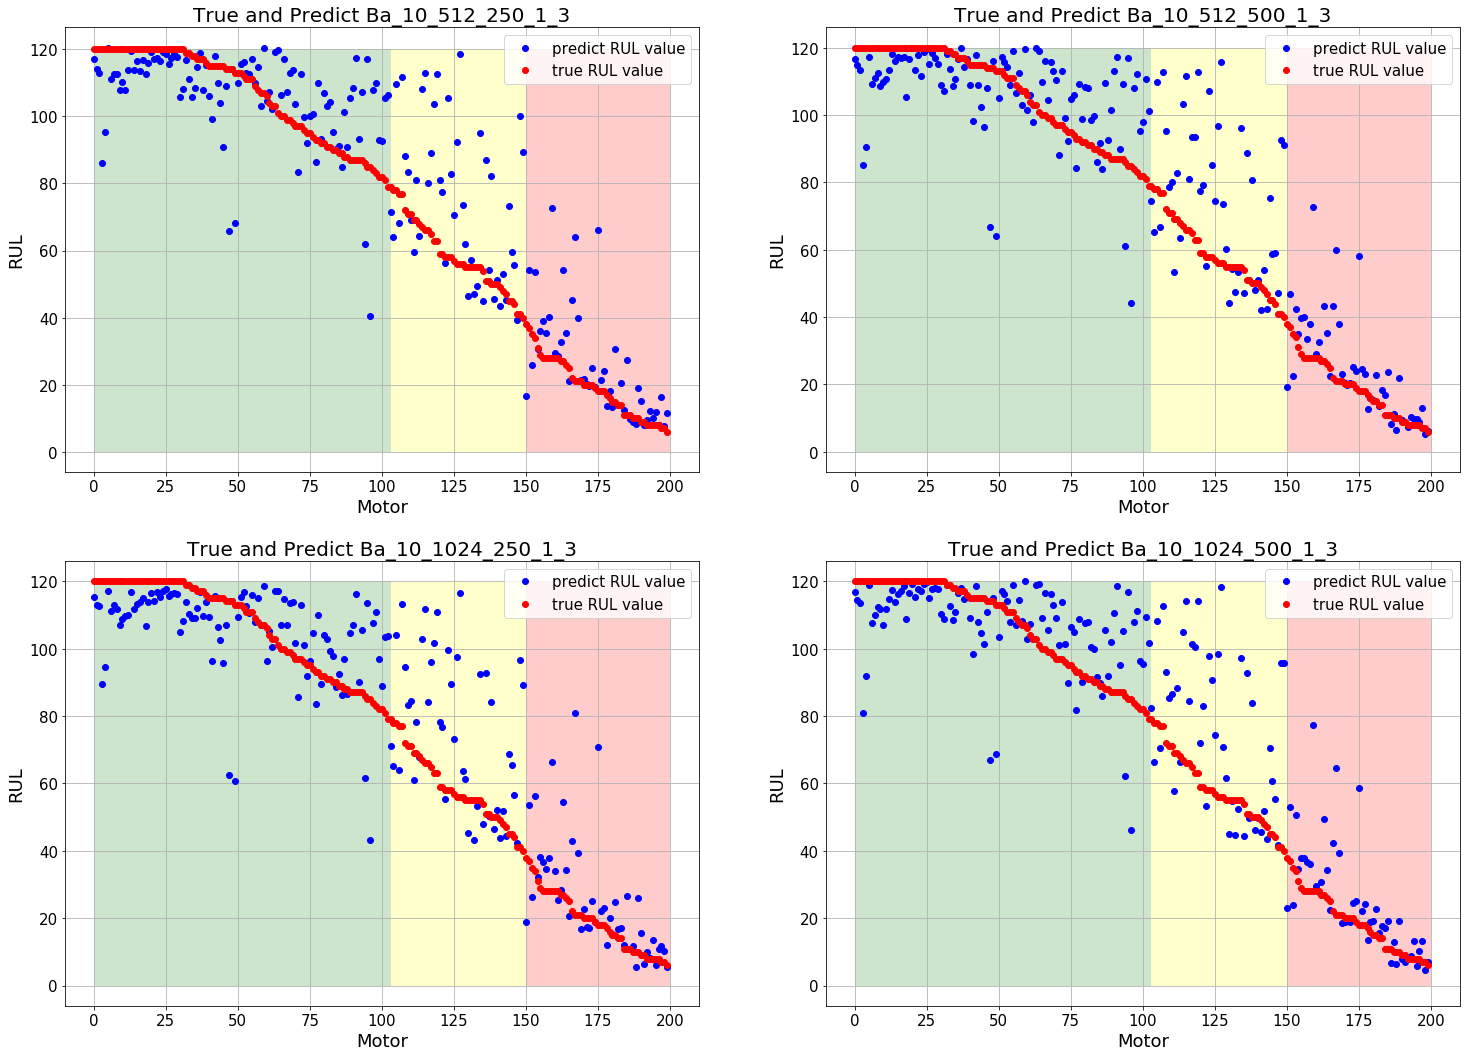

In [16]:
leng = range(len(predictions13))

plt.figure(figsize=(25,18))

plt.subplot(224)
plt.grid(True) 
plt.plot(leng, predictions_Ba_FD001_FD003_1024_500_10, 'bo',lw=0.5, label='predict RUL value')
plt.plot(leng, predictions13,'ro',lw=0.5, label='true RUL value')
plt.fill_between([103,0],[120,120],facecolor='green',alpha=0.2)
plt.fill_between([150,103],[120,120],facecolor='yellow',alpha=0.2)
plt.fill_between([200,150],[120,120],facecolor='red',alpha=0.2)
plt.ylabel('RUL',fontsize=18)
plt.xlabel('Motor',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('True and Predict Ba_10_1024_500_1_3',fontsize=20)
plt.legend(prop={"size":15})

plt.subplot(223)
plt.grid(True) 
plt.plot(leng, predictions_Ba_FD001_FD003_1024_250_10,'bo',lw=0.5, label='predict RUL value')
plt.plot(leng, predictions13,'ro',lw=0.5, label='true RUL value')
plt.fill_between([103,0],[120,120],facecolor='green',alpha=0.2)
plt.fill_between([150,103],[120,120],facecolor='yellow',alpha=0.2)
plt.fill_between([200,150],[120,120],facecolor='red',alpha=0.2)
plt.ylabel('RUL',fontsize=18)
plt.xlabel('Motor',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('True and Predict Ba_10_1024_250_1_3',fontsize=20)
plt.legend(prop={"size":15})

plt.subplot(222)
plt.grid(True) 
plt.plot(leng, predictions_Ba_FD001_FD003_512_500_10,'bo',lw=0.2, label='predict RUL value')
plt.plot(leng, predictions13,'ro',lw=0.5, label='true RUL value')
plt.fill_between([103,0],[120,120],facecolor='green',alpha=0.2)
plt.fill_between([150,103],[120,120],facecolor='yellow',alpha=0.2)
plt.fill_between([200,150],[120,120],facecolor='red',alpha=0.2)
plt.ylabel('RUL',fontsize=18)
plt.xlabel('Motor',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('True and Predict Ba_10_512_500_1_3',fontsize=20)
plt.legend(prop={"size":15})

plt.subplot(221)
plt.grid(True) 
plt.plot(leng, predictions_Ba_FD001_FD003_512_250_10,'bo',lw=0, label='predict RUL value')
plt.plot(leng, predictions13,'ro',lw=0.1, label='true RUL value')
plt.fill_between([103,0],[120,120],facecolor='green',alpha=0.2)
plt.fill_between([150,103],[120,120],facecolor='yellow',alpha=0.2)
plt.fill_between([200,150],[120,120],facecolor='red',alpha=0.2)
plt.ylabel('RUL',fontsize=18)
plt.xlabel('Motor',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('True and Predict Ba_10_512_250_1_3',fontsize=20)
plt.legend(prop={"size":15})

plt.savefig('predicts_Ba_10_1_3.png')
plt.show()


# Training y validation error - Ba/Dataset FD002+FD004/Ntw = 19

In [17]:
obj_text = codecs.open("FD002+FD004/19_1024_250/losstrain_Ba_FD002+FD004_1024_250_19.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
losstrain_Ba_FD002_FD004_1024_250_19 = np.array(np.log10(b_new))

#### mismo para train

obj_text = codecs.open("FD002+FD004/19_1024_250/lossval_Ba_FD002+FD004_1024_250_19.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
lossval_Ba_FD002_FD004_1024_250_19 = np.array(np.log10(b_new))

In [18]:
obj_text = codecs.open("FD002+FD004/19_1024_500/losstrain_Ba_FD002+FD004_1024_500_19.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
losstrain_Ba_FD002_FD004_1024_500_19 = np.array(np.log10(b_new))

##

obj_text = codecs.open("FD002+FD004/19_1024_500/lossval_Ba_FD002+FD004_1024_500_19.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
lossval_Ba_FD002_FD004_1024_500_19 = np.array(np.log10(b_new))

In [19]:
obj_text = codecs.open("FD002+FD004/19_512_250/losstrain_Ba_FD002+FD004_512_250_19.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
losstrain_Ba_FD002_FD004_512_250_19 = np.array(np.log10(b_new))

##

obj_text = codecs.open("FD002+FD004/19_512_250/lossval_Ba_FD002+FD004_512_250_19.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
lossval_Ba_FD002_FD004_512_250_19 = np.array(np.log10(b_new))

In [20]:
obj_text = codecs.open("FD002+FD004/19_512_500/losstrain_Ba_FD002+FD004_512_500_19.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
losstrain_Ba_FD002_FD004_512_500_19 = np.array(np.log10(b_new))

##

obj_text = codecs.open("FD002+FD004/19_512_500/lossval_Ba_FD002+FD004_512_500_19.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
lossval_Ba_FD002_FD004_512_500_19 = np.array(np.log10(b_new))

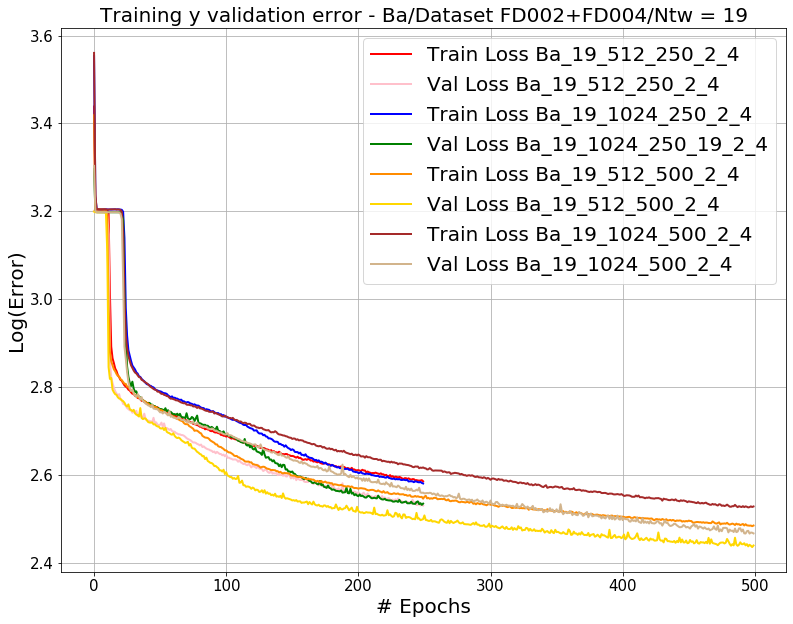

In [21]:
epochs1 = range(len(losstrain_Ba_FD002_FD004_1024_250_19))
epochs2 = range(len(losstrain_Ba_FD002_FD004_1024_500_19))

plt.figure(figsize=(13,10))
plt.grid(True) 
plt.plot(epochs1, losstrain_Ba_FD002_FD004_512_250_19, 'red',lw=2, label='Train Loss Ba_19_512_250_2_4')
plt.plot(epochs1, lossval_Ba_FD002_FD004_512_250_19, 'pink',lw=2, label='Val Loss Ba_19_512_250_2_4')
plt.plot(epochs1, losstrain_Ba_FD002_FD004_1024_250_19, 'blue',lw=2, label='Train Loss Ba_19_1024_250_2_4')
plt.plot(epochs1, lossval_Ba_FD002_FD004_1024_250_19, 'green',lw=2, label='Val Loss Ba_19_1024_250_19_2_4')
plt.plot(epochs2, losstrain_Ba_FD002_FD004_512_500_19, 'darkorange',lw=2, label='Train Loss Ba_19_512_500_2_4')
plt.plot(epochs2, lossval_Ba_FD002_FD004_512_500_19, 'gold',lw=2, label='Val Loss Ba_19_512_500_2_4')
plt.plot(epochs2, losstrain_Ba_FD002_FD004_1024_500_19, 'brown',lw=2, label='Train Loss Ba_19_1024_500_2_4')
plt.plot(epochs2, lossval_Ba_FD002_FD004_1024_500_19, 'tan',lw=2, label='Val Loss Ba_19_1024_500_2_4')
plt.ylabel("Log(Error)",fontsize=20)
plt.xlabel("# Epochs",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Training y validation error - Ba/Dataset FD002+FD004/Ntw = 19',fontsize=20)
plt.legend(prop={"size":20})
  
plt.savefig("error_Ba_19_2_4.png")
plt.show()

# predictions - Ba/Dataset FD002+FD004/Ntw = 19

In [22]:
obj_text = codecs.open("FD002+FD004/19_1024_500/predictions_Ba_FD002+FD004_1024_500_19.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
predictions_Ba_FD002_FD004_1024_500_19 = np.array(b_new)[::-1]

##

obj_text = codecs.open("FD002+FD004/19_1024_250/predictions_Ba_FD002+FD004_1024_250_19.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
predictions_Ba_FD002_FD004_1024_250_19 = np.array(b_new)[::-1]

##
obj_text = codecs.open("FD002+FD004/19_512_500/predictions_Ba_FD002+FD004_512_500_19.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
predictions_Ba_FD002_FD004_512_500_19 = np.array(b_new)[::-1]

##
obj_text = codecs.open("FD002+FD004/19_512_250/predictions_Ba_FD002+FD004_512_250_19.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
predictions_Ba_FD002_FD004_512_250_19 = np.array(b_new)[::-1]

##

obj_text = codecs.open("predicts24.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
predictions24 = np.array(b_new)[::-1]

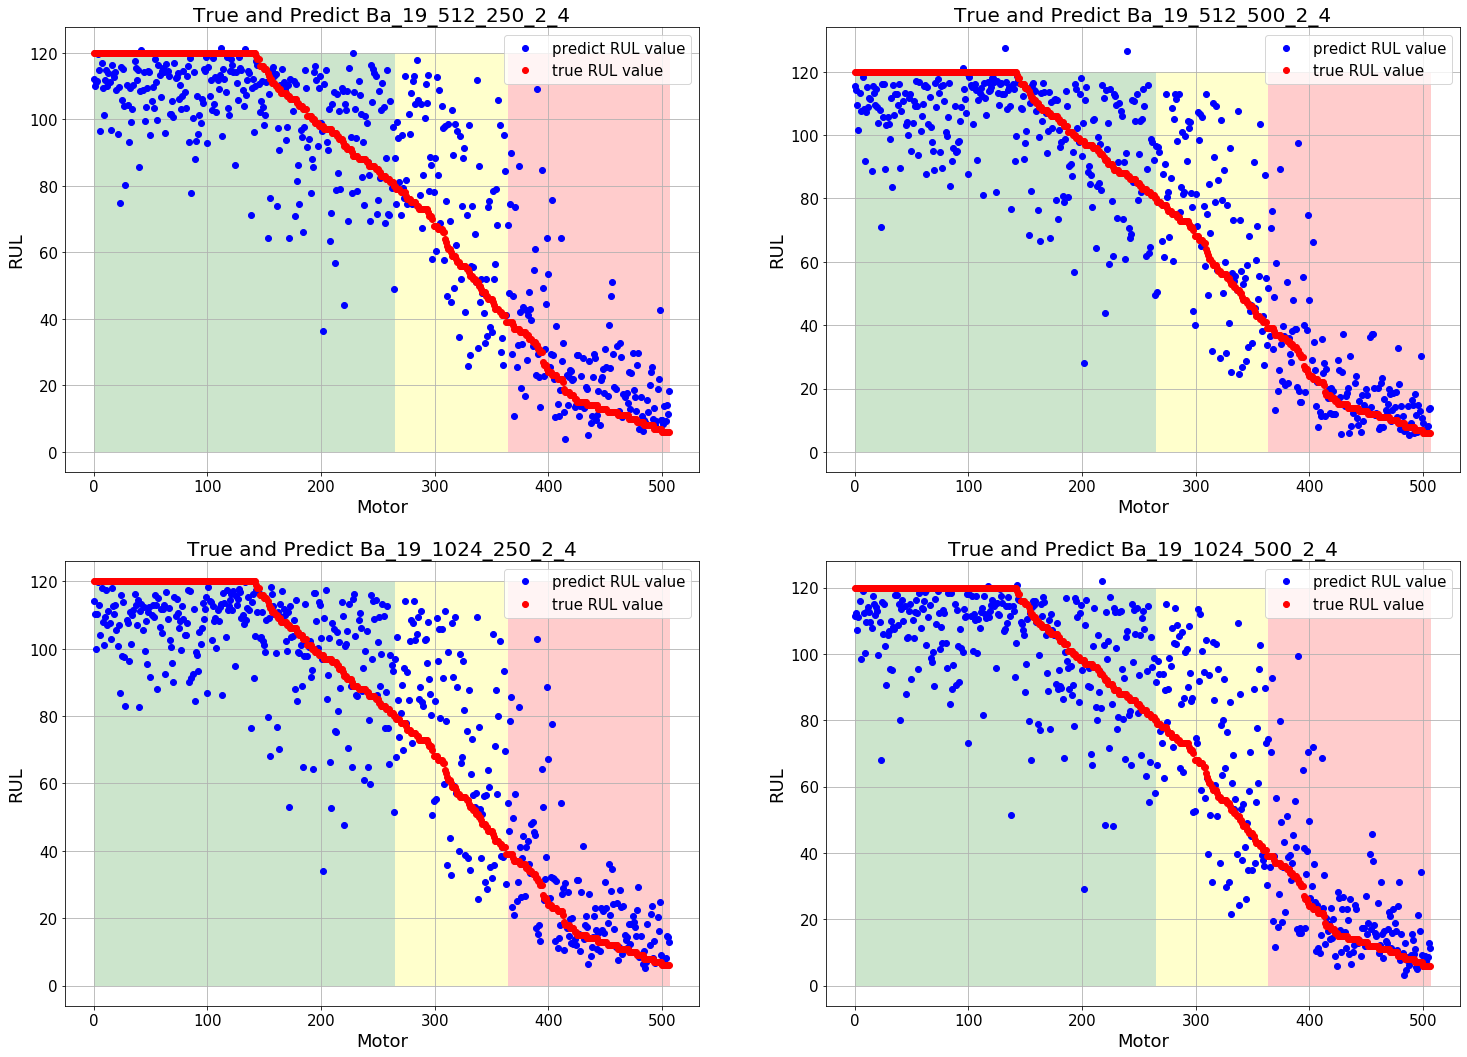

In [23]:
leng = range(len(predictions24))

plt.figure(figsize=(25,18))

plt.subplot(224)
plt.grid(True) 
plt.plot(leng, predictions_Ba_FD002_FD004_1024_500_19, 'bo',lw=0.5, label='predict RUL value')
plt.plot(leng, predictions24,'ro',lw=0.5, label='true RUL value')
plt.fill_between([265,0],[120,120],facecolor='green',alpha=0.2)
plt.fill_between([364,265],[120,120],facecolor='yellow',alpha=0.2)
plt.fill_between([507,364],[120,120],facecolor='red',alpha=0.2)
plt.ylabel('RUL',fontsize=18)
plt.xlabel('Motor',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('True and Predict Ba_19_1024_500_2_4',fontsize=20)
plt.legend(prop={"size":15})

plt.subplot(223)
plt.grid(True) 
plt.plot(leng, predictions_Ba_FD002_FD004_1024_250_19,'bo',lw=0.5, label='predict RUL value')
plt.plot(leng, predictions24,'ro',lw=0.5, label='true RUL value')
plt.fill_between([265,0],[120,120],facecolor='green',alpha=0.2)
plt.fill_between([364,265],[120,120],facecolor='yellow',alpha=0.2)
plt.fill_between([507,364],[120,120],facecolor='red',alpha=0.2)
plt.ylabel('RUL',fontsize=18)
plt.xlabel('Motor',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('True and Predict Ba_19_1024_250_2_4',fontsize=20)
plt.legend(prop={"size":15})

plt.subplot(222)
plt.grid(True) 
plt.plot(leng, predictions_Ba_FD002_FD004_512_500_19,'bo',lw=0.2, label='predict RUL value')
plt.plot(leng, predictions24,'ro',lw=0.5, label='true RUL value')
plt.fill_between([265,0],[120,120],facecolor='green',alpha=0.2)
plt.fill_between([364,265],[120,120],facecolor='yellow',alpha=0.2)
plt.fill_between([507,364],[120,120],facecolor='red',alpha=0.2)
plt.ylabel('RUL',fontsize=18)
plt.xlabel('Motor',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('True and Predict Ba_19_512_500_2_4',fontsize=20)
plt.legend(prop={"size":15})

plt.subplot(221)
plt.grid(True) 
plt.plot(leng, predictions_Ba_FD002_FD004_512_250_19,'bo',lw=0, label='predict RUL value')
plt.plot(leng, predictions24,'ro',lw=0.1, label='true RUL value')
plt.fill_between([265,0],[120,120],facecolor='green',alpha=0.2)
plt.fill_between([364,265],[120,120],facecolor='yellow',alpha=0.2)
plt.fill_between([507,364],[120,120],facecolor='red',alpha=0.2)
plt.ylabel('RUL',fontsize=18)
plt.xlabel('Motor',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('True and Predict Ba_19_512_250_2_4',fontsize=20)
plt.legend(prop={"size":15})

plt.savefig('predicts_Ba_19_2_4.png')
plt.show()

# Training y validation error - Li/Dataset FD002+FD004/Ntw = 10

In [24]:
obj_text = codecs.open("FD002+FD004/10_1024_250/losstrain_Ba_FD002+FD004_1024_250_10.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
losstrain_Ba_FD002_FD004_1024_250_10 = np.array(np.log10(b_new))

#### mismo para train

obj_text = codecs.open("FD002+FD004/10_1024_250/lossval_Ba_FD002+FD004_1024_250_10.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
lossval_Ba_FD002_FD004_1024_250_10 = np.array(np.log10(b_new))

In [25]:
obj_text = codecs.open("FD002+FD004/10_1024_500/losstrain_Ba_FD002+FD004_1024_500_10.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
losstrain_Ba_FD002_FD004_1024_500_10 = np.array(np.log10(b_new))

##

obj_text = codecs.open("FD002+FD004/10_1024_500/lossval_Ba_FD002+FD004_1024_500_10.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
lossval_Ba_FD002_FD004_1024_500_10 = np.array(np.log10(b_new))

In [26]:
obj_text = codecs.open("FD002+FD004/10_512_250/losstrain_Ba_FD002+FD004_512_250_10.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
losstrain_Ba_FD002_FD004_512_250_10 = np.array(np.log10(b_new))

##

obj_text = codecs.open("FD002+FD004/10_512_250/lossval_Ba_FD002+FD004_512_250_10.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
lossval_Ba_FD002_FD004_512_250_10 = np.array(np.log10(b_new))

In [27]:
obj_text = codecs.open("FD002+FD004/10_512_500/losstrain_Ba_FD002+FD004_512_500_10.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
losstrain_Ba_FD002_FD004_512_500_10 = np.array(np.log10(b_new))

##

obj_text = codecs.open("FD002+FD004/10_512_500/lossval_Ba_FD002+FD004_512_500_10.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
lossval_Ba_FD002_FD004_512_500_10 = np.array(np.log10(b_new))

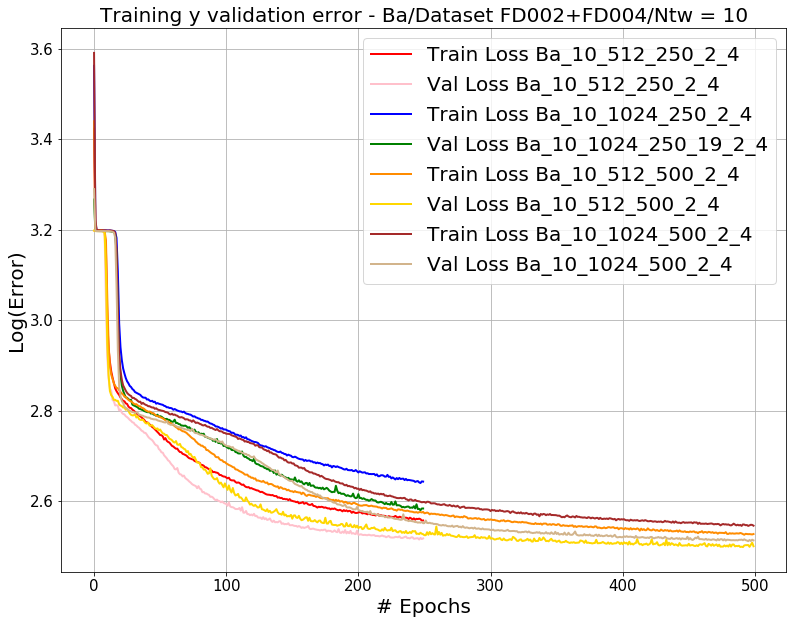

In [28]:
epochs1 = range(len(losstrain_Ba_FD002_FD004_1024_250_10))
epochs2 = range(len(losstrain_Ba_FD002_FD004_1024_500_10))

plt.figure(figsize=(13,10))
plt.grid(True) 
plt.plot(epochs1, losstrain_Ba_FD002_FD004_512_250_10, 'red',lw=2, label='Train Loss Ba_10_512_250_2_4')
plt.plot(epochs1, lossval_Ba_FD002_FD004_512_250_10, 'pink',lw=2, label='Val Loss Ba_10_512_250_2_4')
plt.plot(epochs1, losstrain_Ba_FD002_FD004_1024_250_10, 'blue',lw=2, label='Train Loss Ba_10_1024_250_2_4')
plt.plot(epochs1, lossval_Ba_FD002_FD004_1024_250_10, 'green',lw=2, label='Val Loss Ba_10_1024_250_19_2_4')
plt.plot(epochs2, losstrain_Ba_FD002_FD004_512_500_10, 'darkorange',lw=2, label='Train Loss Ba_10_512_500_2_4')
plt.plot(epochs2, lossval_Ba_FD002_FD004_512_500_10, 'gold',lw=2, label='Val Loss Ba_10_512_500_2_4')
plt.plot(epochs2, losstrain_Ba_FD002_FD004_1024_500_10, 'brown',lw=2, label='Train Loss Ba_10_1024_500_2_4')
plt.plot(epochs2, lossval_Ba_FD002_FD004_1024_500_10, 'tan',lw=2, label='Val Loss Ba_10_1024_500_2_4')
plt.ylabel("Log(Error)",fontsize=20)
plt.xlabel("# Epochs",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Training y validation error - Ba/Dataset FD002+FD004/Ntw = 10',fontsize=20)
plt.legend(prop={"size":20})
  
plt.savefig("error_Ba_10_2_4.png")
plt.show()

# predictions - Ba/Dataset FD002+FD004/Ntw = 10

In [29]:
obj_text = codecs.open("FD002+FD004/10_1024_500/predictions_Ba_FD002+FD004_1024_500_10.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
predictions_Ba_FD002_FD004_1024_500_10 = np.array(b_new)[::-1]

##

obj_text = codecs.open("FD002+FD004/10_1024_250/predictions_Ba_FD002+FD004_1024_250_10.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
predictions_Ba_FD002_FD004_1024_250_10 = np.array(b_new)[::-1]

##
obj_text = codecs.open("FD002+FD004/10_512_500/predictions_Ba_FD002+FD004_512_500_10.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
predictions_Ba_FD002_FD004_512_500_10 = np.array(b_new)[::-1]

##
obj_text = codecs.open("FD002+FD004/10_512_250/predictions_Ba_FD002+FD004_512_250_10.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
predictions_Ba_FD002_FD004_512_250_10 = np.array(b_new)[::-1]

##

obj_text = codecs.open("predicts24.json", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
predictions24 = np.array(b_new)[::-1]

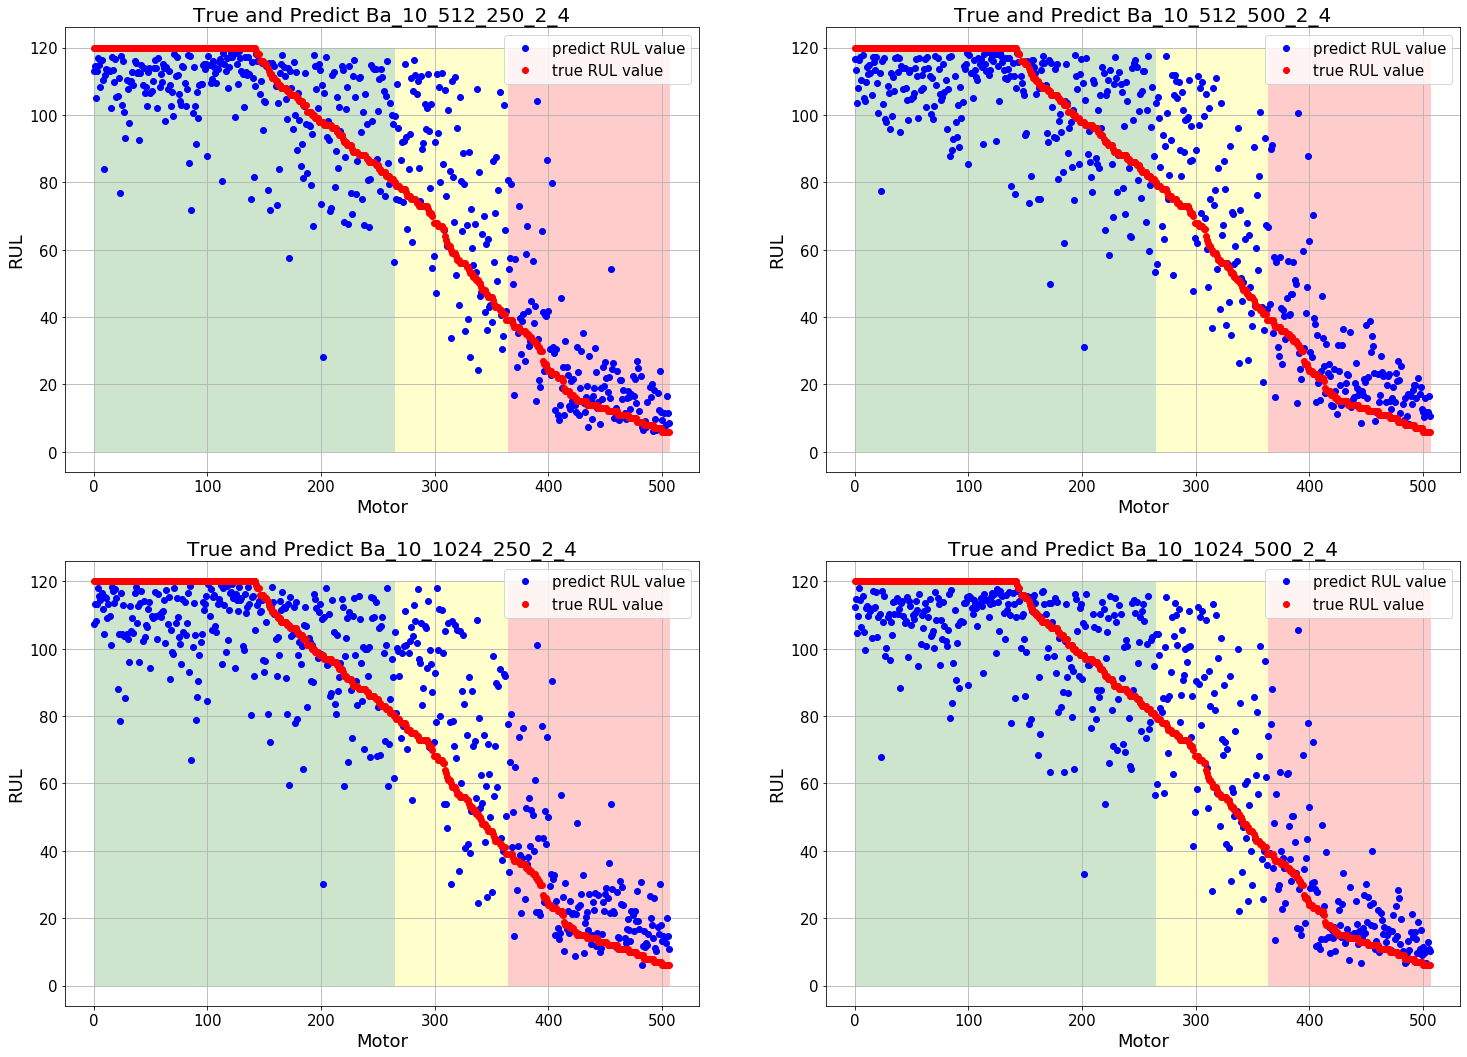

In [30]:
leng = range(len(predictions24))

plt.figure(figsize=(25,18))

plt.subplot(224)
plt.grid(True) 
plt.plot(leng, predictions_Ba_FD002_FD004_1024_500_10, 'bo',lw=0.5, label='predict RUL value')
plt.plot(leng, predictions24,'ro',lw=0.5, label='true RUL value')
plt.fill_between([265,0],[120,120],facecolor='green',alpha=0.2)
plt.fill_between([364,265],[120,120],facecolor='yellow',alpha=0.2)
plt.fill_between([507,364],[120,120],facecolor='red',alpha=0.2)
plt.ylabel('RUL',fontsize=18)
plt.xlabel('Motor',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('True and Predict Ba_10_1024_500_2_4',fontsize=20)
plt.legend(prop={"size":15})

plt.subplot(223)
plt.grid(True) 
plt.plot(leng, predictions_Ba_FD002_FD004_1024_250_10,'bo',lw=0.5, label='predict RUL value')
plt.plot(leng, predictions24,'ro',lw=0.5, label='true RUL value')
plt.fill_between([265,0],[120,120],facecolor='green',alpha=0.2)
plt.fill_between([364,265],[120,120],facecolor='yellow',alpha=0.2)
plt.fill_between([507,364],[120,120],facecolor='red',alpha=0.2)
plt.ylabel('RUL',fontsize=18)
plt.xlabel('Motor',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('True and Predict Ba_10_1024_250_2_4',fontsize=20)
plt.legend(prop={"size":15})

plt.subplot(222)
plt.grid(True) 
plt.plot(leng, predictions_Ba_FD002_FD004_512_500_10,'bo',lw=0.2, label='predict RUL value')
plt.plot(leng, predictions24,'ro',lw=0.5, label='true RUL value')
plt.fill_between([265,0],[120,120],facecolor='green',alpha=0.2)
plt.fill_between([364,265],[120,120],facecolor='yellow',alpha=0.2)
plt.fill_between([507,364],[120,120],facecolor='red',alpha=0.2)
plt.ylabel('RUL',fontsize=18)
plt.xlabel('Motor',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('True and Predict Ba_10_512_500_2_4',fontsize=20)
plt.legend(prop={"size":15})

plt.subplot(221)
plt.grid(True) 
plt.plot(leng, predictions_Ba_FD002_FD004_512_250_10,'bo',lw=0, label='predict RUL value')
plt.plot(leng, predictions24,'ro',lw=0.1, label='true RUL value')
plt.fill_between([265,0],[120,120],facecolor='green',alpha=0.2)
plt.fill_between([364,265],[120,120],facecolor='yellow',alpha=0.2)
plt.fill_between([507,364],[120,120],facecolor='red',alpha=0.2)
plt.ylabel('RUL',fontsize=18)
plt.xlabel('Motor',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('True and Predict Ba_10_512_250_2_4',fontsize=20)
plt.legend(prop={"size":15})

plt.savefig('predicts_Ba_10_2_4.png')
plt.show()